In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Reddit_depression_dataset.csv')

In [3]:
data.head()

,text,label
0,"He said he had not felt that way before, sugge...",mild
1,"Hey there r/assistance, Not sure if this is th...",minimum
2,My mom then hit me with the newspaper and it s...,minimum
3,"until i met my new boyfriend, he is amazing, h...",mild
4,October is Domestic Violence Awareness Month a...,moderate


In [4]:
labels = np.asarray(data['label'])

In [6]:
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts )

['mild' 'minimum' 'moderate' 'severe']
[ 290 2587  394  282]


In [7]:
i = [len(entry) for entry in data['text']]

In [8]:
i = np.asarray(i)

print(np.mean(i))
print(np.std(i))

447.66985645933016
167.92631516187853


## Data Preprocessing:

In [ ]:
!pip install nltk

In [ ]:
from nltk import punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(501)



In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data['text'].dropna(inplace=True)
data['text'] = [entry.lower() for entry in data['text']]

data['text'] = [word_tokenize(entry) for entry in data['text']] #tokenize words



In [ ]:
# lemmanization:

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data.loc[index,'text_final'] = str(Final_words)

In [ ]:
data.head()

,text,label,text_final
0,"[he, said, he, had, not, felt, that, way, befo...",mild,"['say', 'felt', 'way', 'suggeted', 'go', 'rest..."
1,"[hey, there, r/assistance, ,, not, sure, if, t...",minimum,"['hey', 'sure', 'right', 'place', 'post', 'go'..."
2,"[my, mom, then, hit, me, with, the, newspaper,...",minimum,"['mom', 'hit', 'newspaper', 'shock', 'would', ..."
3,"[until, i, met, my, new, boyfriend, ,, he, is,...",mild,"['meet', 'new', 'boyfriend', 'amazing', 'kind'..."
4,"[october, is, domestic, violence, awareness, m...",moderate,"['october', 'domestic', 'violence', 'awareness..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

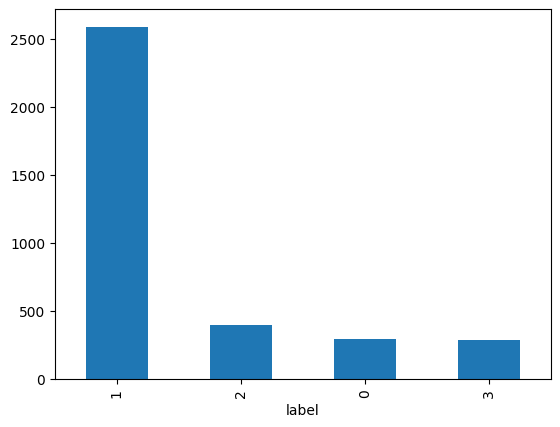

In [31]:
import matplotlib.pyplot as plt
data['label'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
le.classes_

array(['mild', 'minimum', 'moderate', 'severe'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['text'], data['label'], test_size=0.2, stratify=data['label'], random_state=42)

# Further split the training set into training and validation sets
Train_X, Val_X, Train_Y, Val_Y = train_test_split(Train_X, Train_Y, test_size=0.25, stratify=Train_Y, random_state=42)

# Convert Series to strings if they are lists
Train_X = Train_X.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
Test_X = Test_X.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
Val_X = Val_X.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Val_X_Tfidf = Tfidf_vect.transform(Val_X)

print(f"Training set size: {Train_X.shape}")
print(f"Validation set size: {Val_X.shape}")
print(f"Test set size: {Test_X.shape}")

Training set size: (2131,)
Validation set size: (711,)
Test set size: (711,)


In [ ]:
print(Tfidf_vect.vocabulary_)

{'say': 3814, 'felt': 1661, 'way': 4866, 'go': 1895, 'rest': 3707, 'trigger': 4599, 'ahead': 104, 'like': 2598, 'decide': 1091, 'look': 2638, 'feeling': 1657, 'doom': 1311, 'hope': 2111, 'maybe': 2720, 'get': 1874, 'suck': 4278, 'rabbit': 3515, 'hole': 2089, 'stupid': 4254, 'psychic': 3460, 'test': 4428, 'new': 2904, 'age': 94, 'something': 4083, 'could': 956, 'even': 1533, 'laugh': 2534, 'road': 3748, 'end': 1463, 'reading': 3562, 'sense': 3889, 'various': 4777, 'health': 2038, 'one': 3014, 'prone': 3429, 'top': 4531, 'worry': 4954, 'heart': 2043, 'happen': 2006, 'physical': 3226, 'hour': 2137, 'hey': 2070, 'sure': 4315, 'right': 3740, 'place': 3251, 'post': 3319, 'currently': 1030, 'student': 4245, 'intern': 2340, 'national': 2862, 'lab': 2507, 'work': 4944, 'survey': 4329, 'help': 2059, 'improve': 2218, 'marketing': 2703, 'effort': 1415, 'many': 2696, 'school': 3832, 'recruit': 3601, 'around': 215, 'country': 967, 'current': 1029, 'stem': 4190, 'know': 2501, 'would': 4961, 'greatly'

## Model Training:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
SVM = svm.SVC(class_weight='balanced')

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the transformed training data
grid_search.fit(Train_X_Tfidf, Train_Y) # Use the transformed data here

# Get the best estimator from the grid search
best_svm = grid_search.best_estimator_

# Predict the labels on the validation set using the best estimator
# Transform the validation data before prediction
val_predictions_SVM = best_svm.predict(Val_X_Tfidf) # Use the transformed data here

# Evaluate the model on the validation set
print(f"SVM Best Parameters: {grid_search.best_params_}")
print(f"SVM Validation Accuracy Score -> {accuracy_score(val_predictions_SVM, Val_Y) * 100:.2f}%")

# Classification report and confusion matrix for validation set
print("Validation Classification Report:")
print(classification_report(Val_Y, val_predictions_SVM))

print("Validation Confusion Matrix:")
print(confusion_matrix(Val_Y, val_predictions_SVM))

SVM Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Validation Accuracy Score -> 73.84%
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.02      0.03        58
           1       0.75      0.99      0.85       518
           2       0.47      0.11      0.18        79
           3       0.75      0.05      0.10        56

    accuracy                           0.74       711
   macro avg       0.54      0.29      0.29       711
weighted avg       0.67      0.74      0.65       711

Validation Confusion Matrix:
[[  1  53   4   0]
 [  1 512   5   0]
 [  2  67   9   1]
 [  1  51   1   3]]


In [ ]:
# Predict the labels on the test set using the best estimator
test_predictions_SVM = best_svm.predict(Test_X_Tfidf)

# Evaluate the model on the test set
print(f"SVM Test Accuracy Score -> {accuracy_score(test_predictions_SVM, Test_Y) * 100:.2f}%")

# Classification report and confusion matrix for test set
print("Test Classification Report:")
print(classification_report(Test_Y, test_predictions_SVM))

print("Test Confusion Matrix:")
print(confusion_matrix(Test_Y, test_predictions_SVM))


SVM Test Accuracy Score -> 72.57%
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.74      0.98      0.84       518
           2       0.37      0.09      0.14        79
           3       0.20      0.02      0.03        56

    accuracy                           0.73       711
   macro avg       0.58      0.28      0.26       711
weighted avg       0.68      0.73      0.63       711

Test Confusion Matrix:
[[  1  55   1   1]
 [  0 507   8   3]
 [  0  72   7   0]
 [  0  52   3   1]]


In [28]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate synthetic samples using SMOTE
smote = SMOTE(random_state=42)
Train_X_Tfidf_smote, Train_Y_smote = smote.fit_resample(Train_X_Tfidf, Train_Y)

# Define parameter grids for Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

param_grid_sgd = {
    'loss': ['hinge',  'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

# Initialize classifiers
svm_classifier = svm.SVC()
sgd_classifier = SGDClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(Train_X_Tfidf_smote, Train_Y_smote)

grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5, scoring='accuracy')
grid_search_sgd.fit(Train_X_Tfidf_smote, Train_Y_smote)

# Get the best estimators from the grid search
best_svm_smote = grid_search_svm.best_estimator_
best_sgd_smote = grid_search_sgd.best_estimator_

# Predict the labels on the validation set using the best estimators
val_predictions_svm_smote = best_svm_smote.predict(Val_X_Tfidf)
val_predictions_sgd_smote = best_sgd_smote.predict(Val_X_Tfidf)

# Evaluate the models on the validation set
print(f"SVM (SMOTE) Best Parameters: {grid_search_svm.best_params_}")
print(f"SVM (SMOTE) Validation Accuracy Score -> {accuracy_score(val_predictions_svm_smote, Val_Y) * 100:.2f}%")
print("Validation Classification Report for SVM (SMOTE):")
print(classification_report(Val_Y, val_predictions_svm_smote))
print("Validation Confusion Matrix for SVM (SMOTE):")
print(confusion_matrix(Val_Y, val_predictions_svm_smote))

print(f"SGD (SMOTE) Best Parameters: {grid_search_sgd.best_params_}")
print(f"SGD (SMOTE) Validation Accuracy Score -> {accuracy_score(val_predictions_sgd_smote, Val_Y) * 100:.2f}%")
print("Validation Classification Report for SGD (SMOTE):")
print(classification_report(Val_Y, val_predictions_sgd_smote))
print("Validation Confusion Matrix for SGD (SMOTE):")
print(confusion_matrix(Val_Y, val_predictions_sgd_smote))

# Evaluate the models on the test set
test_predictions_svm_smote = best_svm_smote.predict(Test_X_Tfidf)
test_predictions_sgd_smote = best_sgd_smote.predict(Test_X_Tfidf)

print(f"SVM (SMOTE) Test Accuracy Score -> {accuracy_score(test_predictions_svm_smote, Test_Y) * 100:.2f}%")
print("Test Classification Report for SVM (SMOTE):")
print(classification_report(Test_Y, test_predictions_svm_smote))
print("Test Confusion Matrix for SVM (SMOTE):")
print(confusion_matrix(Test_Y, test_predictions_svm_smote))

print(f"SGD (SMOTE) Test Accuracy Score -> {accuracy_score(test_predictions_sgd_smote, Test_Y) * 100:.2f}%")
print("Test Classification Report for SGD (SMOTE):")
print(classification_report(Test_Y, test_predictions_sgd_smote))
print("Test Confusion Matrix for SGD (SMOTE):")
print(confusion_matrix(Test_Y, test_predictions_sgd_smote))


SVM (SMOTE) Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
SVM (SMOTE) Validation Accuracy Score -> 73.14%
Validation Classification Report for SVM (SMOTE):
              precision    recall  f1-score   support

           0       0.40      0.03      0.06        58
           1       0.76      0.97      0.85       518
           2       0.41      0.11      0.18        79
           3       0.22      0.07      0.11        56

    accuracy                           0.73       711
   macro avg       0.45      0.30      0.30       711
weighted avg       0.65      0.73      0.65       711

Validation Confusion Matrix for SVM (SMOTE):
[[  2  49   3   4]
 [  2 505   5   6]
 [  1  65   9   4]
 [  0  47   5   4]]
SGD (SMOTE) Best Parameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'loss': 'modified_huber', 'penalty': 'l2'}
SGD (SMOTE) Validation Accuracy Score -> 67.23%
Validation Classification Report for SGD (SMOTE):
              precision    recall  f1-scor

## Data Visualisation

SVM (SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        58
           1       0.75      0.97      0.85       518
           2       0.30      0.09      0.14        79
           3       0.25      0.05      0.09        56

    accuracy                           0.72       711
   macro avg       0.41      0.29      0.28       711
weighted avg       0.63      0.72      0.64       711



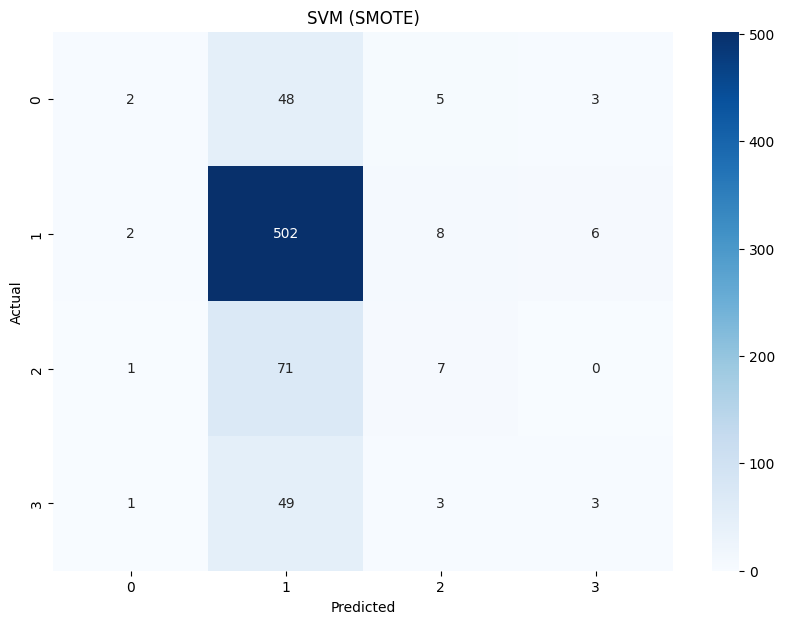

SGD (SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.16      0.17        58
           1       0.80      0.84      0.82       518
           2       0.32      0.30      0.31        79
           3       0.22      0.20      0.21        56

    accuracy                           0.67       711
   macro avg       0.39      0.37      0.38       711
weighted avg       0.65      0.67      0.66       711



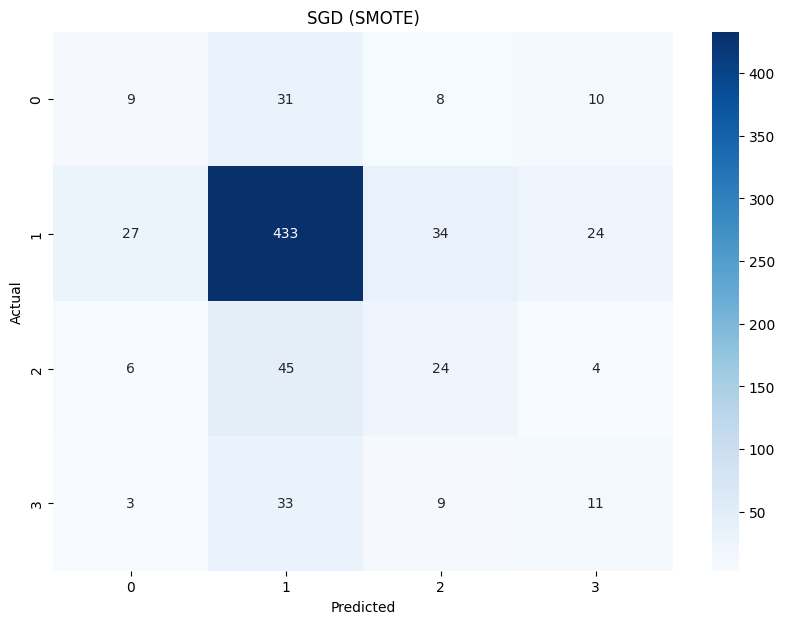

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to display classification report
def display_classification_report(y_true, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_true, y_pred))

# Plot and display classification reports and confusion matrices for SVM and SGD
models = {
    'SVM (SMOTE)': (test_predictions_svm_smote, "Test Classification Report for SVM (SMOTE)"),
    'SGD (SMOTE)': (test_predictions_sgd_smote, "Test Classification Report for SGD (SMOTE)")
}

for model_name, (predictions, report_title) in models.items():
    display_classification_report(Test_Y, predictions, model_name)
    plot_confusion_matrix(Test_Y, predictions, model_name)

## Pretrained model vs trained models:

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Zero-Shot Classification Test Accuracy Score -> 12.79887482419128
Test Classification Report for Zero-Shot Classification:
              precision    recall  f1-score   support

           0       0.09      0.10      0.09        58
           1       0.80      0.07      0.13       518
           2       0.11      0.39      0.18        79
           3       0.05      0.30      0.09        56

    accuracy                           0.13       711
   macro avg       0.26      0.22      0.12       711
weighted avg       0.61      0.13      0.13       711

Test Confusion Matrix for Zero-Shot Classification:
[[  6   3  30  19]
 [ 49  37 181 251]
 [  6   3  31  39]
 [  8   3  28  17]]
Zero-Shot Classification Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.10      0.09        58
           1       0.80      0.07      0.13       518
           2       0.11      0.39      0.18        79
           3       0.05      0.30      0.09     

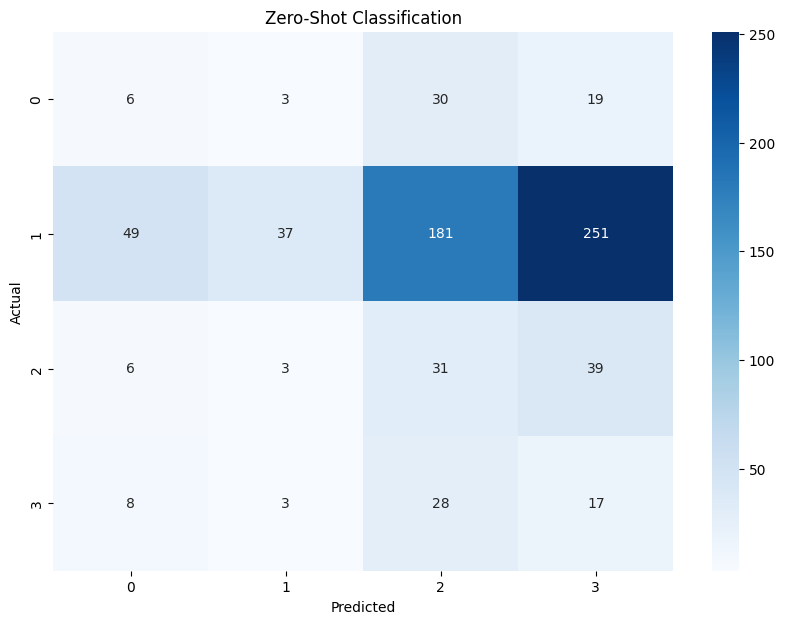

In [39]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pretrained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Define representative text for each class label
class_labels = {
    0: "text representing class 0",
    1: "text representing class 1",
    2: "text representing class 2",
    3: "text representing class 3"
}

# Generate embeddings for each class label
class_embeddings = {label: model.encode([text])[0] for label, text in class_labels.items()}

# Generate embeddings for test data
Test_X_Embeddings = model.encode(Test_X.tolist())

# Function to predict class based on cosine similarity
def predict_class(embedding, class_embeddings):
    similarities = {label: np.dot(embedding, class_embedding) / (np.linalg.norm(embedding) * np.linalg.norm(class_embedding))
                    for label, class_embedding in class_embeddings.items()}
    return max(similarities, key=similarities.get)

# Predict classes for test data
test_predictions_zero_shot = [predict_class(embedding, class_embeddings) for embedding in Test_X_Embeddings]

# Evaluate the zero-shot predictions
print("Zero-Shot Classification Test Accuracy Score ->", accuracy_score(test_predictions_zero_shot, Test_Y) * 100)
print("Test Classification Report for Zero-Shot Classification:")
print(classification_report(Test_Y, test_predictions_zero_shot))
print("Test Confusion Matrix for Zero-Shot Classification:")
print(confusion_matrix(Test_Y, test_predictions_zero_shot))

# Plot and display zero-shot classification report and confusion matrix
display_classification_report(Test_Y, test_predictions_zero_shot, "Zero-Shot Classification")
plot_confusion_matrix(Test_Y, test_predictions_zero_shot, "Zero-Shot Classification")

In [ ]:
!pip install -U sentence-transformers

## Testing Depression Theories:

Theories of depression, features or patterns that have been observed
Check if in our data we can find them

In [ ]:
!pip install shap

  0%|          | 0/50 [00:00<?, ?it/s]

SHAP Summary Plot for SVM (SMOTE)


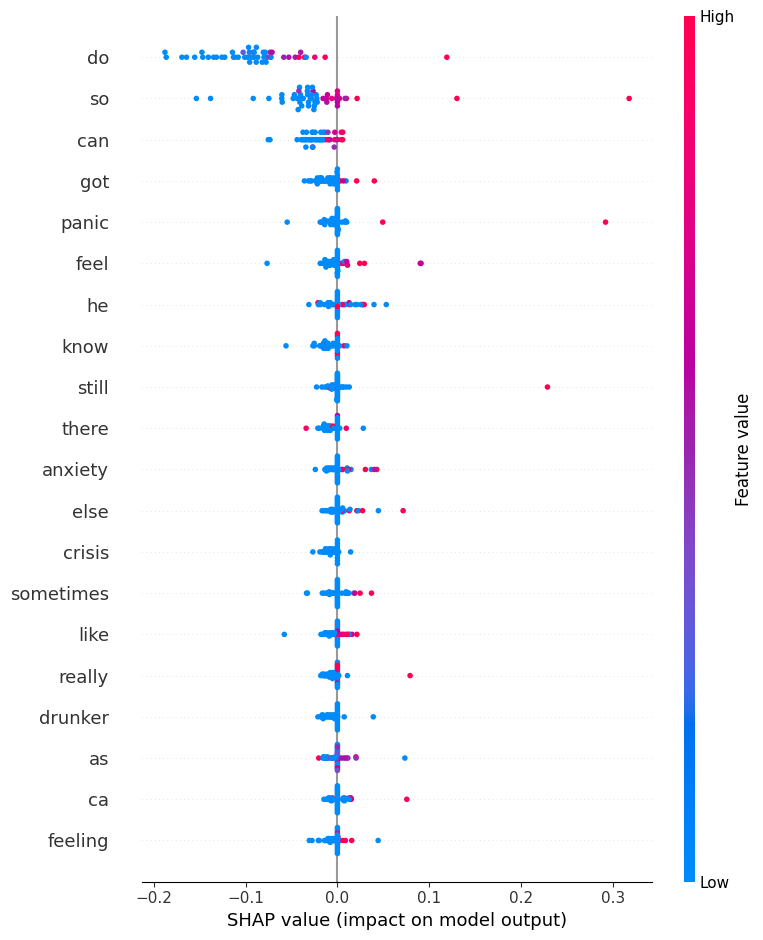

SHAP Force Plot for SVM (SMOTE) - Test Sample 1
SHAP Force Plot for SVM (SMOTE) - Test Sample 2
SHAP Force Plot for SVM (SMOTE) - Test Sample 3


  0%|          | 0/50 [00:00<?, ?it/s]

SHAP Summary Plot for SGD (SMOTE)


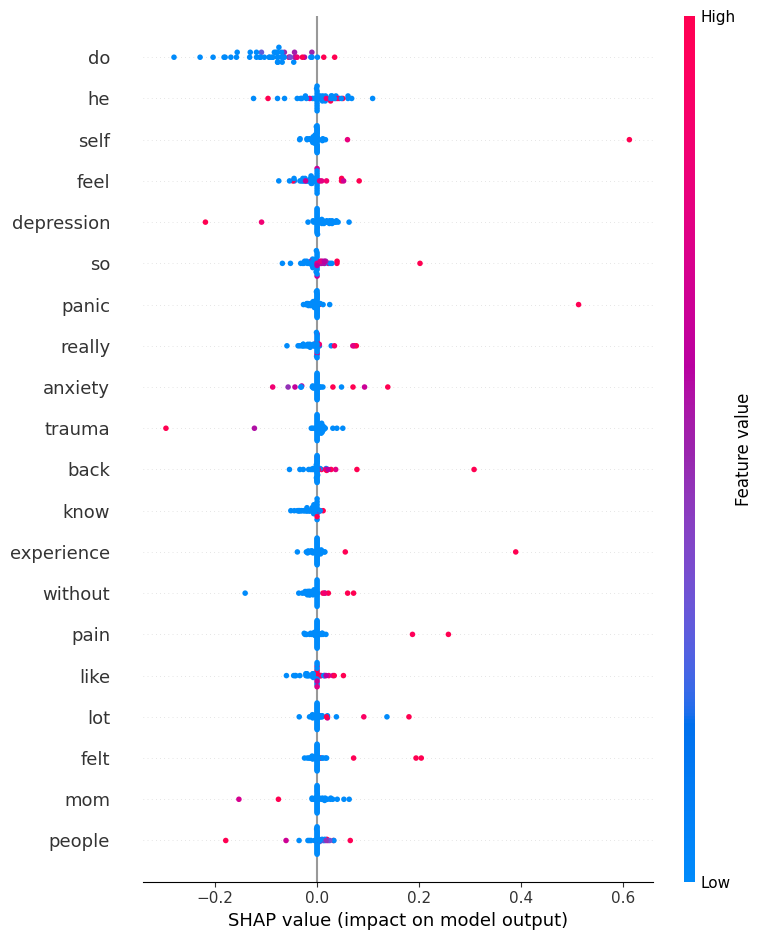

SHAP Force Plot for SGD (SMOTE) - Test Sample 1
SHAP Force Plot for SGD (SMOTE) - Test Sample 2
SHAP Force Plot for SGD (SMOTE) - Test Sample 3


In [41]:
import shap
import numpy as np

# Function to explain and visualize the model with SHAP
def explain_model_with_shap(model, model_name, X_train, X_test, feature_names):
    # Sample a small subset of the training data for the SHAP explainer
    sample_size = 50
    X_train_sample = shap.sample(X_train, sample_size).toarray()
    X_test_sample = shap.sample(X_test, sample_size).toarray()

    # Initialize SHAP explainer with the sampled training data
    explainer = shap.KernelExplainer(model.predict, X_train_sample)

    # Compute SHAP values for the sampled test data
    shap_values = explainer.shap_values(X_test_sample)

    # Visualize SHAP values
    print(f"SHAP Summary Plot for {model_name}")
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)

    # Visualize SHAP values for individual predictions
    for i in range(3):  # Visualize for the first three test samples
        print(f"SHAP Force Plot for {model_name} - Test Sample {i+1}")
        shap.force_plot(explainer.expected_value, shap_values[i], X_test_sample[i], feature_names=feature_names)

# Explain SVM (SMOTE) model
explain_model_with_shap(best_svm_smote, "SVM (SMOTE)", Train_X_Tfidf_smote, Test_X_Tfidf, Tfidf_vect.get_feature_names_out())

# Explain SGD (SMOTE) model
explain_model_with_shap(best_sgd_smote, "SGD (SMOTE)", Train_X_Tfidf_smote, Test_X_Tfidf, Tfidf_vect.get_feature_names_out())
